In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Hr analysis.csv')

In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
data.shape

(14999, 10)

In [5]:
#to check if any values are missing
round(100*(data.isnull().sum()/len(data.index)),2)

satisfaction_level       0.0
last_evaluation          0.0
number_project           0.0
average_montly_hours     0.0
time_spend_company       0.0
Work_accident            0.0
left                     0.0
promotion_last_5years    0.0
Department               0.0
salary                   0.0
dtype: float64

In [6]:
data['satisfaction_level'].value_counts()

0.10    358
0.11    335
0.74    257
0.77    252
0.84    247
       ... 
0.25     34
0.28     31
0.27     30
0.12     30
0.26     30
Name: satisfaction_level, Length: 92, dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
Department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [8]:
data['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [9]:
# the following function provides us with a estimate of how does a person leavong a job effect based on the dataset provided
def check(feature):
    left = data[data['left']==1][feature].value_counts()
    working = data[data['left']==0][feature].value_counts()
    new = pd.DataFrame([left,working])
    new.index = ['left','working']
    new.plot(kind = 'bar' ,figsize = (10,7))

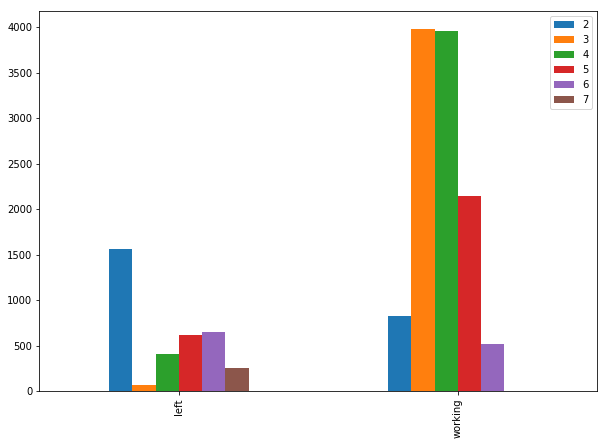

In [10]:
check('number_project')

Number of people who left had done less projects in the company compared to the ones who are still working.
The people who had left the comapny worked only on maximum of 2 projects



In [11]:
data['time_spend_company'].value_counts()

3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: time_spend_company, dtype: int64

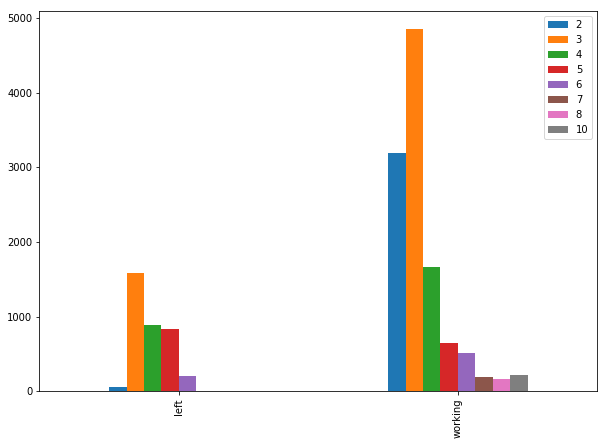

In [12]:
check('time_spend_company')

In [13]:
data['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

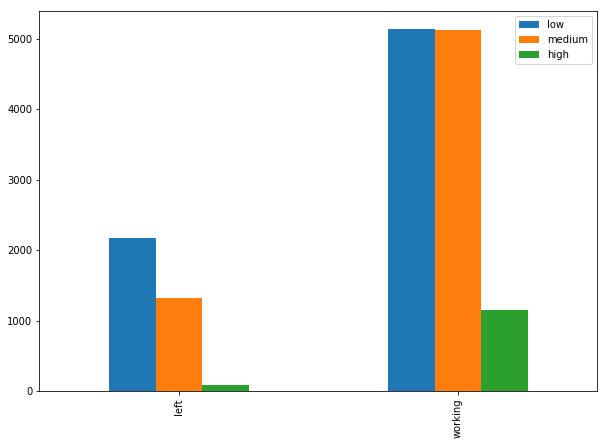

In [14]:
check('salary')

People with high salary are likely to work more in the company

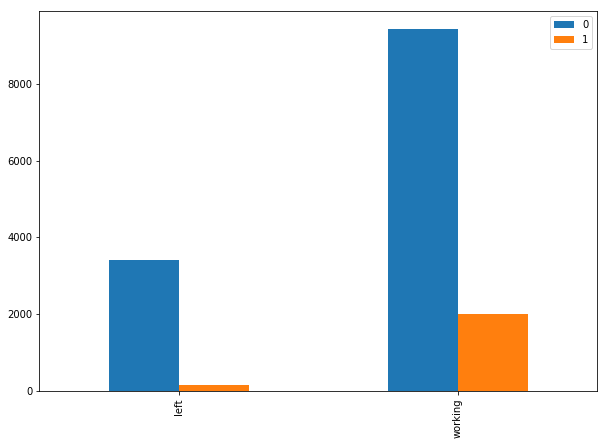

In [15]:
check('Work_accident')

In [16]:
#one hot encoding
dummies = pd.get_dummies(data['salary'])
dummies

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [17]:
data1 = pd.concat([dummies,data], axis =1 )

In [18]:
data1 = data1.drop(['salary'],axis= 1)

In [19]:
data1

,high,low,medium,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department
0,0,1,0,0.38,0.53,2,157,3,0,1,0,sales
1,0,0,1,0.80,0.86,5,262,6,0,1,0,sales
2,0,0,1,0.11,0.88,7,272,4,0,1,0,sales
3,0,1,0,0.72,0.87,5,223,5,0,1,0,sales
4,0,1,0,0.37,0.52,2,159,3,0,1,0,sales
...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0,1,0,0.40,0.57,2,151,3,0,1,0,support
14995,0,1,0,0.37,0.48,2,160,3,0,1,0,support
14996,0,1,0,0.37,0.53,2,143,3,0,1,0,support
14997,0,1,0,0.11,0.96,6,280,4,0,1,0,support


In [20]:
dummies = pd.get_dummies(data1['Department'])
dummies

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,0,1,0
14995,0,0,0,0,0,0,0,0,1,0
14996,0,0,0,0,0,0,0,0,1,0
14997,0,0,0,0,0,0,0,0,1,0


In [21]:
data2 = pd.concat([dummies,data1], axis = 1)

In [22]:
data2 = data2.drop(['Department'], axis =1)

In [23]:
data2

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,...,low,medium,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0,0,0,0,0,0,0,1,0,0,...,1,0,0.38,0.53,2,157,3,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,1,0.80,0.86,5,262,6,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,1,0.11,0.88,7,272,4,0,1,0
3,0,0,0,0,0,0,0,1,0,0,...,1,0,0.72,0.87,5,223,5,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,1,0,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,0,1,0,...,1,0,0.40,0.57,2,151,3,0,1,0
14995,0,0,0,0,0,0,0,0,1,0,...,1,0,0.37,0.48,2,160,3,0,1,0
14996,0,0,0,0,0,0,0,0,1,0,...,1,0,0.37,0.53,2,143,3,0,1,0
14997,0,0,0,0,0,0,0,0,1,0,...,1,0,0.11,0.96,6,280,4,0,1,0


In [24]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 21 columns):
IT                       14999 non-null uint8
RandD                    14999 non-null uint8
accounting               14999 non-null uint8
hr                       14999 non-null uint8
management               14999 non-null uint8
marketing                14999 non-null uint8
product_mng              14999 non-null uint8
sales                    14999 non-null uint8
support                  14999 non-null uint8
technical                14999 non-null uint8
high                     14999 non-null uint8
low                      14999 non-null uint8
medium                   14999 non-null uint8
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left         

In [27]:
x= data2.drop(['left'],axis= 1)
x

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,high,low,medium,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0,0,0,0,0,0,0,1,0,0,0,1,0,0.38,0.53,2,157,3,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1,0.80,0.86,5,262,6,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,1,0.11,0.88,7,272,4,0,0
3,0,0,0,0,0,0,0,1,0,0,0,1,0,0.72,0.87,5,223,5,0,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0,0.37,0.52,2,159,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,0,1,0,0,1,0,0.40,0.57,2,151,3,0,0
14995,0,0,0,0,0,0,0,0,1,0,0,1,0,0.37,0.48,2,160,3,0,0
14996,0,0,0,0,0,0,0,0,1,0,0,1,0,0.37,0.53,2,143,3,0,0
14997,0,0,0,0,0,0,0,0,1,0,0,1,0,0.11,0.96,6,280,4,0,0


In [29]:
y = data2['left']
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size =0.3,random_state=100)

In [36]:
print(X_test.shape)
print(X_train.shape)

(4500, 20)
(10499, 20)


In [40]:
print(y_train.shape)
print(y_test.shape)

(10499,)
(4500,)


In [41]:
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression()
Lr.fit(X_train,y_train)

/home/lokesh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = Lr.predict(X_test)

In [45]:
score = accuracy_score(y_pred,y_test)
score

0.7862222222222223

accuracy score of Logistic Regression gives us a score of 78.6

In [47]:
confusion_matrix(y_test,y_pred)

array([[3164,  237],
       [ 725,  374]])

In [48]:
#Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
Reg= DecisionTreeClassifier()
Reg.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [49]:
y_pred = Reg.predict(X_test)

In [50]:
score = accuracy_score(y_pred,y_test)
score

0.9802222222222222

We see that Decision TRee classsifier provides us with a better model for the above dataset with an score of 98.02%